In [1]:
import pandas as pd 

df  = pd.read_csv("../dataset/cancer.csv")

In [2]:
df.drop('id',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cols = ['radius_mean','concave points_mean','area_mean','perimeter_mean','concavity_mean',]

input = df[cols]

In [4]:
input.head()

,radius_mean,concave points_mean,area_mean,perimeter_mean,concavity_mean
0,17.99,0.14710,1001.0,122.80,0.3001
1,20.57,0.07017,1326.0,132.90,0.0869
2,19.69,0.12790,1203.0,130.00,0.1974
3,11.42,0.10520,386.1,77.58,0.2414
4,20.29,0.10430,1297.0,135.10,0.1980


In [5]:
target = df.diagnosis

target.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

target = le.fit_transform(target)

In [8]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.20)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [29]:
model.fit(x_train,y_train)

pred = model.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(pred,y_test)

classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97        72\n           1       0.95      0.95      0.95        42\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.96      0.96       114\nweighted avg       0.96      0.96      0.96       114\n'

<AxesSubplot:>

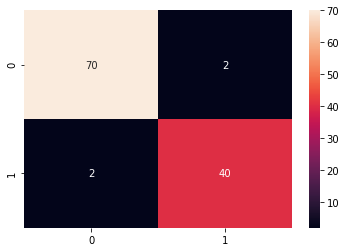

In [30]:
import seaborn as sn 

sn.heatmap(cm,annot=True)

In [32]:
import pickle 

with open("./dump_model/mdoel_beast.pkl","wb") as file:
    pickle.dump(model,file)